In [20]:
import numpy as np
from scipy.stats import shapiro, jarque_bera
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

train_spread = pd.read_csv("train_spread.csv", index_col=0)
test_spread = pd.read_csv("test_spread.csv", index_col=0) 

In [33]:
def SW_JB_testing(spread):
    Shapiro_Wilk = []
    Jarque_Bera = []
    for pair in spread.columns:
        data = spread[pair]
        _, Shapiro_Wilk_p_value = shapiro(data)
        _, Jarque_Bera_p_value = jarque_bera(data)
        Shapiro_Wilk.append(Shapiro_Wilk_p_value)
        Jarque_Bera.append(Jarque_Bera_p_value)
    Shapiro_Wilk = np.array(Shapiro_Wilk)
    Jarque_Bera = np.array(Jarque_Bera)
    
    dist_testing = pd.DataFrame()
    dist_testing.index = spread.columns
    dist_testing["Shapiro-Wilk"] = Shapiro_Wilk
    dist_testing["Jarque-Bera"] = Jarque_Bera
    # dist_testing
    print(f"{sum(Shapiro_Wilk > 0.05)} pairs are likely to be normally distributed based on Shapiro-Wilk Test")
    print(f"{sum(Jarque_Bera > 0.05)} pairs are likely to be normally distributed based on Jarque-Bera Test")

In [35]:
def qq_plot(spread):
    n_datasets = len(spread.columns)
    n_rows = (n_datasets - 1) // 4 + 1
    n_cols = min(n_datasets, 4)
    
    fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(16, 4 * n_rows))
    for i in range(len(spread.columns)):
        row = i // n_cols
        col = i % n_cols
        ax = axes[row, col]
        data = spread.iloc[:,i]
        sm.qqplot(data, line='s', ax=ax)
        ax.set_title(f'{spread.columns[i]}')
        ax.set_xlabel('Theoretical Quantiles')
        ax.set_ylabel('Sample Quantiles')
    if n_datasets < n_rows * n_cols:
        for i in range(n_datasets, n_rows * n_cols):
            fig.delaxes(axes[i // n_cols, i % n_cols])
    fig.tight_layout()
    plt.show()

0 pairs are likely to be normally distributed based on Shapiro-Wilk Test
0 pairs are likely to be normally distributed based on Jarque-Bera Test


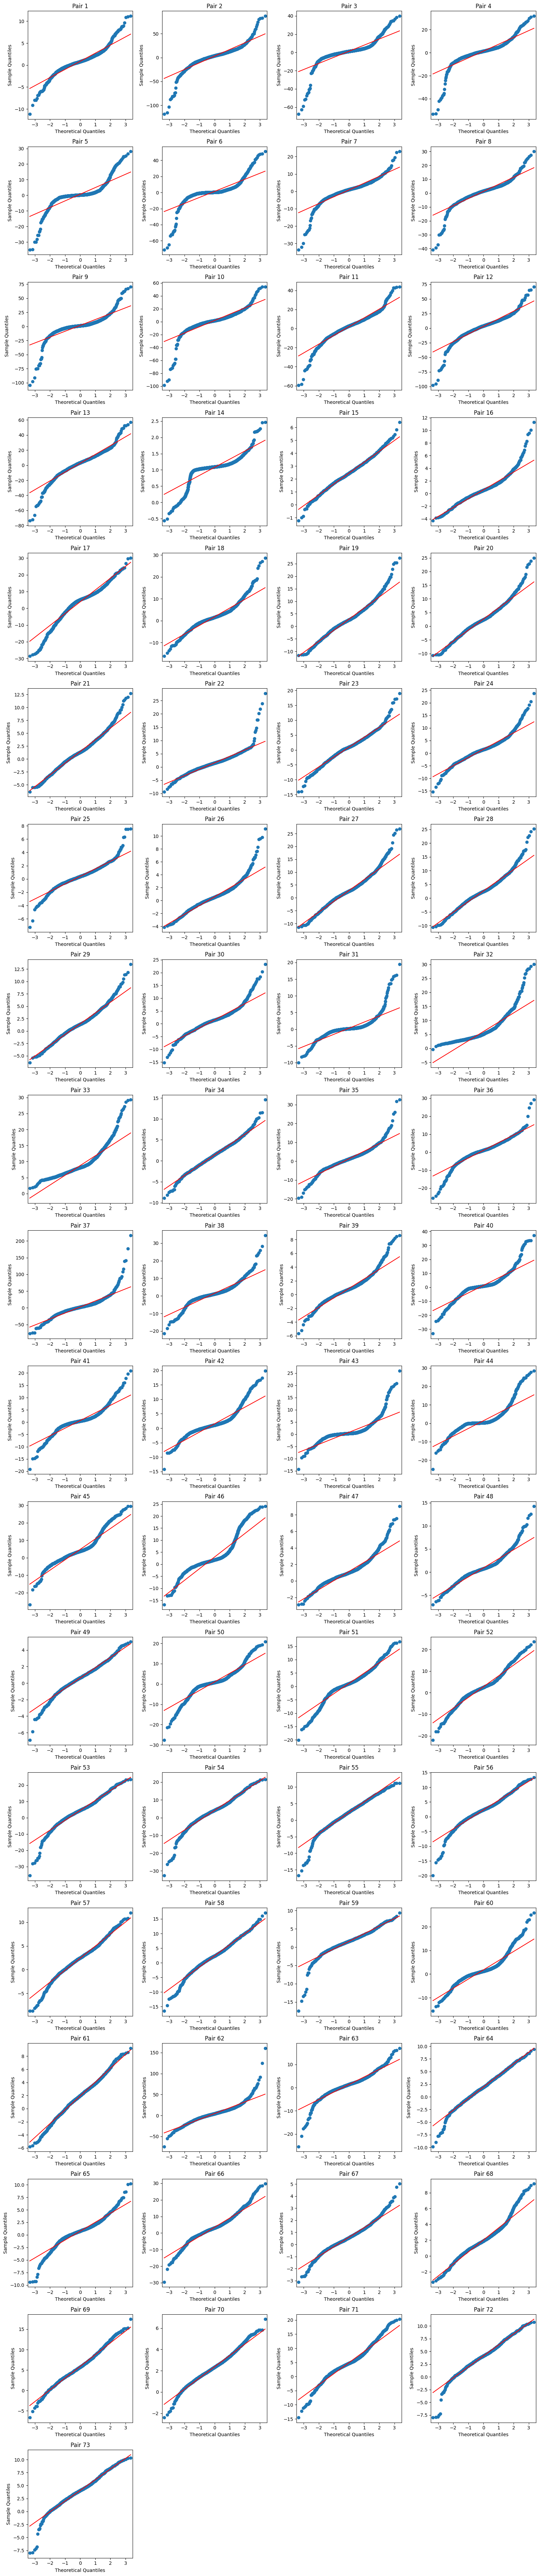

In [36]:
# Training set
SW_JB_testing(train_spread)
qq_plot(train_spread)

10 pairs are likely to be normally distributed based on Shapiro-Wilk Test
18 pairs are likely to be normally distributed based on Jarque-Bera Test


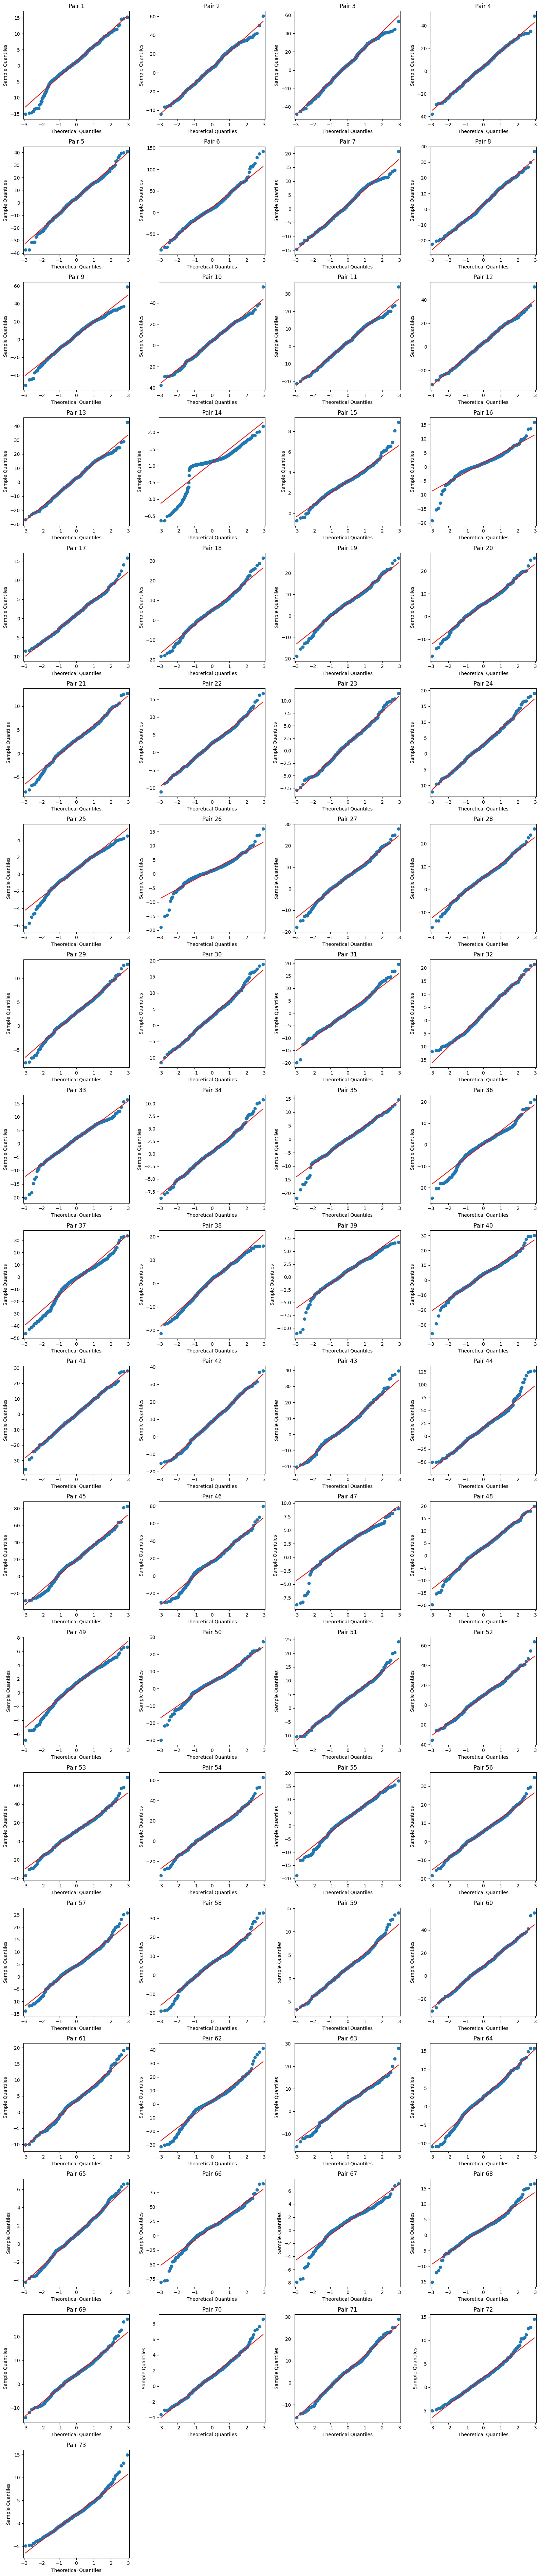

In [37]:
# Testing set
SW_JB_testing(test_spread)
qq_plot(test_spread)